In [46]:
import pandas as pd
import numpy as np
import seaborn as sns

In [47]:
ds = pd.read_csv("sales_data_sample.csv", encoding='Latin-1')
ds.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [48]:
# For clustering, we need all features to be numerical
# if not, we need to perform feature transformation
ds.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [49]:
# Check which features have missing values
# all of these features (mostly depicting location of the order) will be removed
ds.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [50]:
# Convert ORDERDATE to a numeric attribute (Unix timestamp)
ds['ORDERDATE'] = pd.to_datetime(ds['ORDERDATE'])
ds['ORDERDATE'] = ds['ORDERDATE'].astype('int64') // 10**9

# Transform STATUS into a numeric attribute
ds['STATUS'] = ds['STATUS'].replace('Shipped', 1)
ds['STATUS'] = ds['STATUS'].replace('Resolved', 2)
ds['STATUS'] = ds['STATUS'].replace('Cancelled', 3)
ds['STATUS'] = ds['STATUS'].replace('On Hold', 4)
ds['STATUS'] = ds['STATUS'].replace('Disputed', 5)
ds['STATUS'] = ds['STATUS'].replace('In Process', 6)

# Remove PRODUCTCODE
ds = ds.drop(columns=['PRODUCTCODE'])

# Remove address fields
ds = ds.drop(columns=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'TERRITORY', 'CITY', 'STATE', 'COUNTRY'])

# Remove attributes that uniquely identify the customer or the order
ds = ds.drop(columns=['CUSTOMERNAME', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE', 'PHONE'])

# Convert productline to one hot encoding
ds = pd.get_dummies(ds, columns=['PRODUCTLINE'])

C:\Users\equip\AppData\Local\Temp\ipykernel_14188\2157514334.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds['STATUS'] = ds['STATUS'].replace('In Process', 6)


In [53]:
ds.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2.823000e+03,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,1.084235e+09,1.198371,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.992714e+07,0.803278,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.041811e+09,1.000000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,1.068120e+09,1.000000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,1.087258e+09,1.000000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,1.100693e+09,1.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,1.117498e+09,6.000000,4.000000,12.000000,2005.00000,214.000000


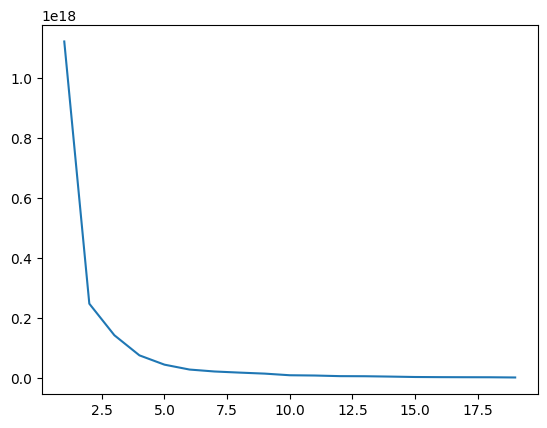

In [60]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

dataset = ds.values

# Store within-cluster sum of squares for different number of clusters
WCSS = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dataset)
    WCSS.append(kmeans.inertia_)
    
# Optimal number of clusters seems to be 3
plt.plot(range(1,20), WCSS)

kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)
labels = kmeans.predict(dataset)
centroids = kmeans.cluster_centers_

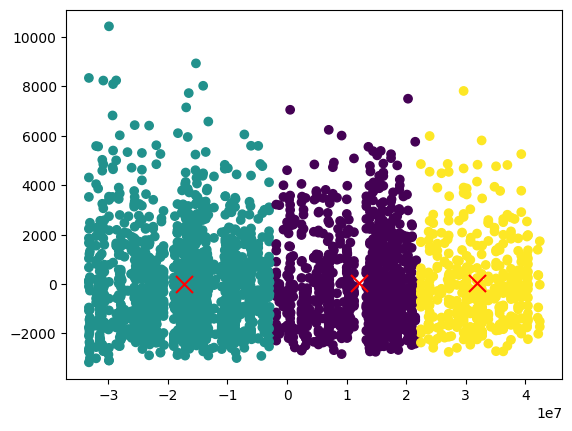

In [63]:
from sklearn.decomposition import PCA
 
# Reduce the dimensions of the data to 2
# to visualize it on a 2D plane
pca = PCA(2)
reduced_dataset = pca.fit_transform(dataset)
reduced_centroids = pca.transform(centroids)

plt.scatter(reduced_dataset[:,0], reduced_dataset[:,1], c=labels, cmap='viridis')
plt.scatter(reduced_centroids[:,0], reduced_centroids[:,1], marker='x', s=150, c='r')

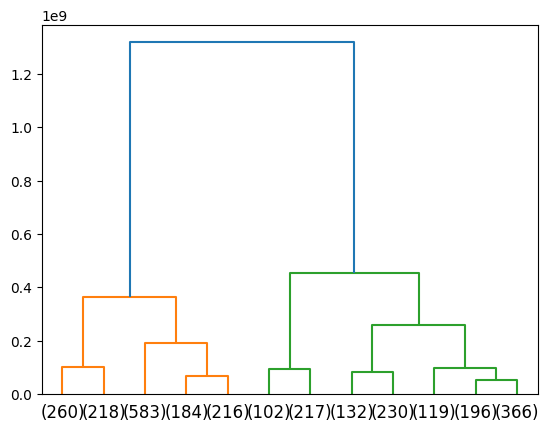

In [72]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Ref: https://en.wikipedia.org/wiki/Hierarchical_clustering
clustering = AgglomerativeClustering().fit(dataset)

# Visualize the dendrogram
Z = linkage(dataset, 'ward')
dendrogram(Z, truncate_mode='lastp', p=12)
plt.show()